In [9]:
# Définir le chemin du fichier
fichier = 'identity_CelebA.txt'

# Initialiser un ensemble (set) pour stocker les labels uniques
labels_uniques = set()
nombre_images = 0

# Lire le fichier et extraire les labels
with open(fichier, 'r') as f:
    for ligne in f:
        # Diviser chaque ligne en mots
        mots = ligne.split()
        
        # Récupérer le label (le dernier mot sur la ligne)
        label = mots[-1]
        
        # Ajouter le label à l'ensemble des labels uniques
        labels_uniques.add(label)
        nombre_images += 1

# Imprimer le nombre de labels uniques
nombre_labels = len(labels_uniques)
print(f"Il y a {nombre_labels} labels différents dans le fichier.")
print(f"Il y a {nombre_images} images différentes dans le fichier.")


Il y a 10177 labels différents dans le fichier.
Il y a 202599 images différentes dans le fichier.


In [2]:
from collections import defaultdict

# Définir le chemin du fichier d'entrée et de sortie
fichier_entree = 'identity_CelebA.txt'
fichier_sortie = 'celebrity_trie.txt'

# Initialiser un dictionnaire par label pour stocker les données triées
donnees_par_label = defaultdict(list)

# Lire le fichier et trier les données par label
with open(fichier_entree, 'r') as f:
    for ligne in f:
        mots = ligne.split()
        label = int(mots[-1])  # Convertir le label en entier
        donnees_par_label[label].append(ligne)

# Trier les données par label
donnees_triees = []
for label in sorted(donnees_par_label.keys()):
    donnees_triees.extend(donnees_par_label[label])

# Écrire les données triées dans un nouveau fichier
with open(fichier_sortie, 'w') as f_sortie:
    f_sortie.writelines(donnees_triees)

print(f"Les données ont été triées par label et enregistrées dans {fichier_sortie}.")


Les données ont été triées par label et enregistrées dans celebrity_trie.txt.


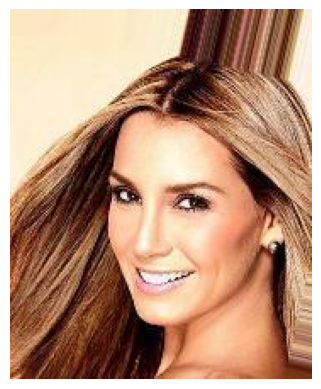

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def afficher_image(chemin_image):
    # Charger l'image
    img = mpimg.imread(chemin_image)

    # Afficher l'image
    plt.imshow(img)
    plt.axis('off')  # Désactiver les axes
    plt.show()

# Exemple d'utilisation
chemin_image = '../../Projet IAI3/img_align_celeba/000001.jpg'
afficher_image(chemin_image)


In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def charger_images_de_fichier(fichier, nombre_images):
    images_model_entrainement = []
    images_model_validation = []
    images_model_test = []

    nombre_images_entrainement = int(nombre_images * 0.6)
    nombre_images_validation = int(nombre_images * 0.2)

    nombre_images_traitees = 0

    with open(fichier, 'r') as f:
        for ligne in f:
            # Diviser chaque ligne en mots
            mots = ligne.split()

            # Récupérer le nom de l'image et le label
            nom_image, label = mots[0], mots[1]

            # Construire le chemin complet de l'image (ajustez le chemin selon votre structure de dossier)
            chemin_image = f"../../Projet IAI3/img_align_celeba/{nom_image}"

            # Charger l'image
            img = mpimg.imread(chemin_image)

            if nombre_images_traitees < nombre_images_entrainement:
                images_model_entrainement.append((img, label))
            elif nombre_images_traitees < nombre_images_entrainement + nombre_images_validation:
                images_model_validation.append((img, label))
            else:
                images_model_test.append((img, label))

            nombre_images_traitees += 1

            # Vérifier si le nombre d'images souhaité a été atteint
            if nombre_images_traitees == nombre_images:
                break

    return images_model_entrainement, images_model_validation, images_model_test


test liste entrainement


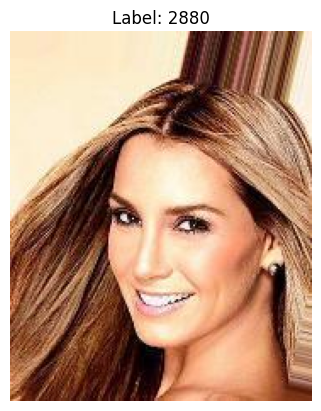

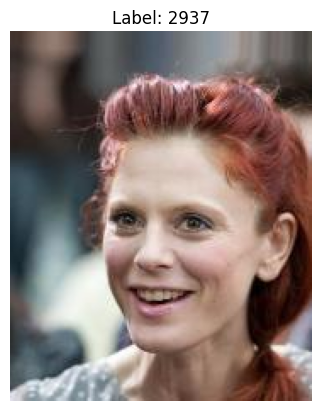

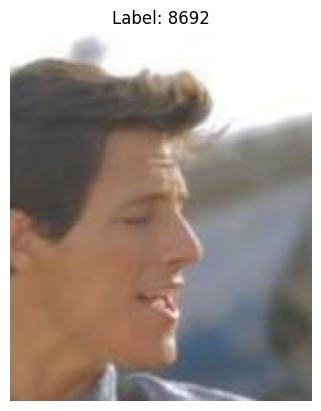

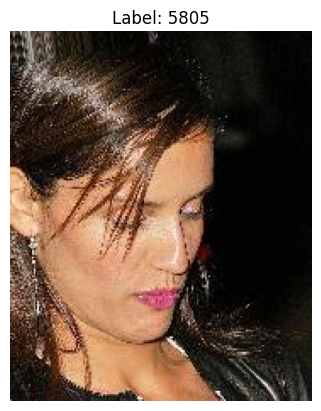

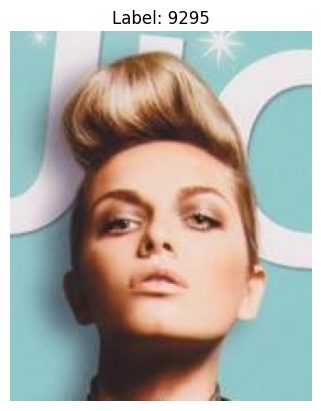

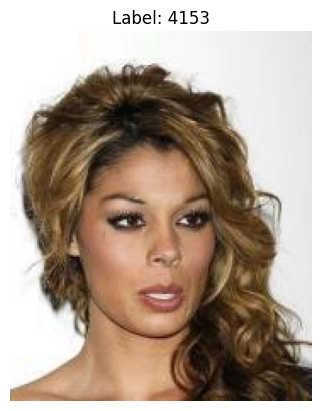

test liste test


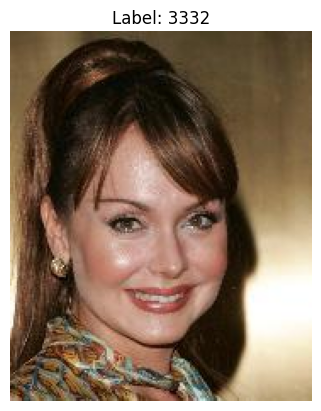

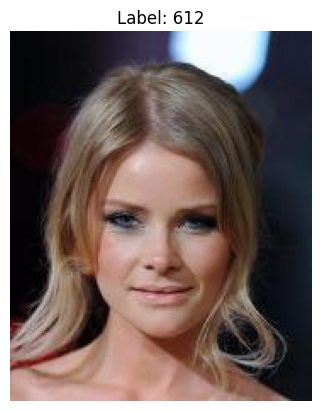

test liste validation


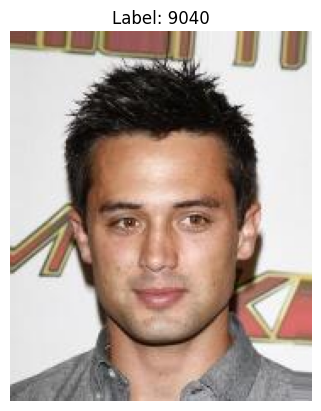

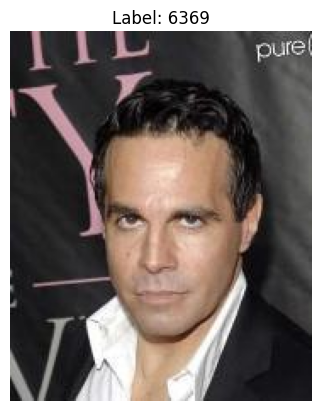

In [25]:
#Création des ensembles de validation, test et d'entrainement

fichier_celebrity = 'identity_CelebA.txt'
liste_images = charger_images_de_fichier(fichier_celebrity, 10)


def test_list(liste):

    # Afficher les images avec leur label
    for img, label in liste:
        plt.imshow(img)
        plt.title(f"Label: {label}")
        plt.axis('off')  # Désactiver les axes
        plt.show()

liste_images_entrainement = liste_images[0]
liste_images_validation = liste_images[1]
liste_images_test = liste_images[2]

print(f"test liste entrainement")
test_list(liste_images_entrainement)
print(f"test liste test")
test_list(liste_images_test)
print(f"test liste validation")
test_list(liste_images_validation)

In [2]:
from torchvision import transforms
from PIL import Image
import os

# Définir le chemin de l'image d'origine
chemin_image = '../../Projet IAI3/img_align_celeba/000023.jpg'

# Charger l'image à l'aide de PIL
img = Image.open(chemin_image)

# Définir la transformation
transform = transforms.Compose([
    transforms.RandomRotation(40),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomResizedCrop((150, 150), scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
])

# Appliquer la transformation à l'image
img_transformed = transform(img)

# Créer le répertoire de sortie s'il n'existe pas
output_dir = 'preview'
os.makedirs(output_dir, exist_ok=True)

# Sauvegarder les images transformées
for i in range(20):
    img_transformed.save(f'{output_dir}/celibity_{i}.jpg')


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.autograd import Variable

# dimensions of our images
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * (img_width // 8) * (img_height // 8), 64)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.flatten(x)
        x = self.relu4(self.fc1(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc2(x))
        return x

# Check if GPU is available and move the model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model, loss function, and optimizer
model = SimpleCNN().to(device)
criterion = nn.BCELoss()
optimizer = optim.RMSprop(model.parameters())

# Data augmentation transformations
train_transform = transforms.Compose([
    transforms.RandomResizedCrop((img_width, img_height), scale=(0.8, 1.2)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
])

# Normalization transformation
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# Load training and validation datasets
train_dataset = datasets.ImageFolder(train_data_dir, transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

validation_dataset = datasets.ImageFolder(validation_data_dir, transform=train_transform)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

# Training the model
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.float().view(-1, 1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

# Save the model
torch.save(model.state_dict(), 'first_try.pth')


FileNotFoundError: [Errno 2] No such file or directory: 'data/train'